# How long is the blacklist?
> A Bayesian approach

- toc: true 
- badges: true
- comments: true
- categories: [Bayesian]
- image: images/2020-03-13-RQ-Decomposition-In-Practice/header.jpg


## Overview

I'm in the process of learning French, and as part of my language learning journey, I'm slowly working my way through *The Blacklist* on Netflix. 

The premise of the show involves an antihero played James Spader working his way through a list of neferious characters, taking them down one at a time.

Out of idle intellectual curiousity, I was curious about how many names are on the list, based on the sample of names that are given. It's actually an interesting problem we can solve using Bayesian analysis, more commonly known as the "German Tank Problem", or the "Locomotive Problem".

Fortunately Wikipedia provides us the data we need to help answer this question.

[R1](https://www.isaacslavitt.com/2015/12/19/german-tank-problem-with-pymc-and-pystan/)

| No. overall | No. in season | Title                      | Blacklist guide | Directed by       | Written by                                                                                            | Original air date  | US viewers(millions) |
|------------|--------------|----------------------------|----------------|-------------------|-------------------------------------------------------------------------------------------------------|--------------------|----------------------|
| 1          | 1            | "Pilot"                    | No. 52         | Joe Carnahan      | Jon Bokenkamp                                                                                         | September 23, 2013 | 12.58[10]            |
| 2          | 2            | "The Freelancer"           | No. 145        | Jace Alexander    | Jon Bokenkamp                                                                                         | September 30, 2013 | 11.35[11]            |
| 3          | 3            | "Wujing"                   | No. 84         | Michael Watkins   | Lukas Reiter                                                                                          | October 7, 2013    | 11.18[12]            |
| 4          | 4            | "The Stewmaker"            | No. 161        | Vince Misiano     | Patrick Massett & John Zinman                                                                         | October 14, 2013   | 10.93[13]            |
| 5          | 5            | "The Courier"              | No. 85         | Nick Gomez        | John C. Kelley                                                                                        | October 21, 2013   | 10.44[14]            |
| 6          | 6            | "Gina Zanetakos"           | No. 152        | Adam Arkin        | Wendy West                                                                                            | October 28, 2013   | 10.51[15]            |
| 7          | 7            | "Frederick Barnes"         | No. 47         | Michael Watkins   | J. R. Orci                                                                                            | November 4, 2013   | 10.34[16]            |
| 8          | 8            | "General Ludd"             | No. 109        | Stephen Surjik    | Amanda Kate Shuman                                                                                    | November 11, 2013  | 10.69[17]            |
| 9          | 9            | "Anslo Garrick"            | No. 16         | Joe Carnahan      | Story by : Joe Carnahan & Jason George Teleplay by : Joe Carnahan                                     | November 25, 2013  | 10.96[18]            |
| 10         | 10           | "Anslo Garrick Conclusion" | No. 16         | Michael Watkins   | Lukas Reiter & J. R. Orci                                                                             | December 2, 2013   | 11.67[19]            |
| 11         | 11           | "The Good Samaritan"       | No. 106        | Dan Lerner        | Brandon Margolis & Brandon Sonnier                                                                    | January 13, 2014   | 9.35[20]             |
| 12         | 12           | "The Alchemist"            | No. 101        | Vince Misiano     | Anthony Sparks                                                                                        | January 20, 2014   | 8.83[21]             |
| 13         | 13           | "The Cyprus Agency"        | No. 64         | Michael Watkins   | Lukas Reiter                                                                                          | January 27, 2014   | 10.17[22]            |
| 14         | 14           | "Madeline Pratt"           | No. 73         | Michael Zinberg   | Jim Campolongo                                                                                        | February 24, 2014  | 11.18[23]            |
| 15         | 15           | "The Judge"                | No. 57         | Peter Werner      | Jonathan Shapiro & Lukas Reiter                                                                       | March 3, 2014      | 11.01[24]            |
| 16         | 16           | "Mako Tanida"              | No. 83         | Michael Watkins   | Story by : Joe Carnahan Teleplay by : John Eisendrath & Jon Bokenkamp & Patrick Massett & John Zinman | March 17, 2014     | 10.97[25]            |
| 17         | 17           | "Ivan"                     | No. 88         | Randy Zisk        | J.R. Orci & Amanda Kate Shuman                                                                        | March 24, 2014     | 10.80[26]            |
| 18         | 18           | "Milton Bobbit"            | No. 135        | Steven A. Adelson | Daniel Voll                                                                                           | March 31, 2014     | 11.39[27]            |
| 19         | 19           | "The Pavlovich Brothers"   | Nos. 119-122   | Paul Edwards      | Elizabeth Benjamin                                                                                    | April 21, 2014     | 11.24[28]            |
| 20         | 20           | "The Kingmaker"            | No. 42         | Karen Gaviola     | J. R. Orci & Lukas Reiter                                                                             | April 28, 2014     | 10.85[29]            |
| 21         | 21           | "Berlin"                   | No. 8          | Michael Zinberg   | John Eisendrath & Jon Bokenkamp                                                                       | May 5, 2014        | 10.47[30]            |
| 22         | 22           | "Berlin Conclusion"        | No. 8          | Michael Watkins   | Story by : Richard D'Ovidio Teleplay by : John Eisendrath & Jon Bokenkamp & Lukas Reiter & J. R. Orci | May 12, 2014       | 10.44[31]            |

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


So, we have: $P = [M | −MC]$

M can be decomposed as $M=KR$ using the RQ decomposition.

```python
M = P[0:3,0:3]
K, R = linalg.rq(M)
```

So far, so good.

Now things get a little more complex. 

We want to find a Camera matrix with a positive diagonal, giving positive focal lengths.

However, in case this doesn't happen, we can adjust the sign of the column of each column of both the $K$ and $R$ matrix, to "Make it so".



```python
T = np.diag(np.sign(np.diag(K)))
if linalg.det(T) < 0:
    T[1,1] *= -1

K = np.dot(K,T)
R = np.dot(T,R)
```


In [28]:
import pymc3 as pm

# D: the data
y = np.array([52, 145, 84, 161, 85, 152,
       47, 109, 16, 16, 106, 101,
       64, 73, 57, 83, 88, 135,
       119,120,121, 122, 42, 8, 8, 104, 112,
       89, 82, 74, 114, 22, 12,
       21, 21, 67, 71, 93, 94,
       75, 7, 97, 117, 62, 87,
       55, 11, 38, 80, 72, 43,
       50, 86, 31, 108, 24, 24,
       95, 132, 103, 77, 113, 78,
       32, 32, 41, 18, 14, 14,
       79, 66, 65, 81, 105, 53,
       98, 98, 111, 163, 102, 184,
       34, 107, 59, 10, 61, 29,
       46, 4, 4, 30, 37, 76, 44,
       54, 90, 48, 13, 118, 100,
       56, 63, 51, 68, 19, 25,
       23, 13, 110, 26, 17, 33,
       20, 124, 146, 147, 131, 91, 116,
       58, 99, 160, 20, 20, 9,
        6, 115, 69, 136, 92, 128,
       60, 15, 27, 27, 151, 138,
       130, 125, 162, 159, 3, 137,
       155, 144, 126, 158, 149,
       150])


#y = y[0:5]

model = pm.Model()
with model:
    # prior - P(N): N ~ uniform(max(y), 500)
    # note: we use a large-ish number for the upper bound
    N = pm.DiscreteUniform("N", lower=y.max(), upper=500)

    # likelihood - P(D|N): y ~ uniform(0, N)
    y_obs = pm.DiscreteUniform("y_obs", lower=0, upper=N, observed=y)

    # choose the sampling method - we have to use Metropolis-Hastings because
    # the variables are discrete
    step = pm.Metropolis()
    
    # we'll use four chains, and parallelize to four cores
    start = {"N": y.max()} # the highest number is a reasonable starting point
    trace = pm.sample(100000, step, start)
    
    

149


Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [N]
Sampling 2 chains, 0 divergences: 100%|██████████| 201000/201000 [00:22<00:00, 9126.36draws/s]
The number of effective samples is smaller than 10% for some parameters.


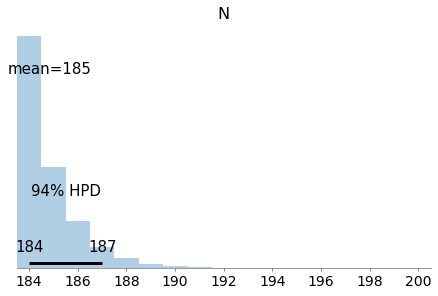

In [29]:
pm.plot_posterior(trace);